# Day 19: Naive Bayes 🧠

## What is Naive Bayes?
- Probabilistic classifier based on **Bayes’ Theorem**:
  
  **P(A|B) = P(B|A) * P(A) / P(B)**

- “Naive” assumption: **features are independent**.  
- Works well for **text classification, spam detection, medical diagnosis**, etc.

### Types of Naive Bayes:
1. **GaussianNB** → For continuous data (assumes Gaussian distribution)  
2. **MultinomialNB** → For count data (e.g., word counts)  
3. **BernoulliNB** → For binary features


In [4]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


## Example Dataset: Iris 🌸 (Continuous Data → GaussianNB)


In [5]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Train Gaussian Naive Bayes Model


In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)


## Model Evaluation 📊


Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



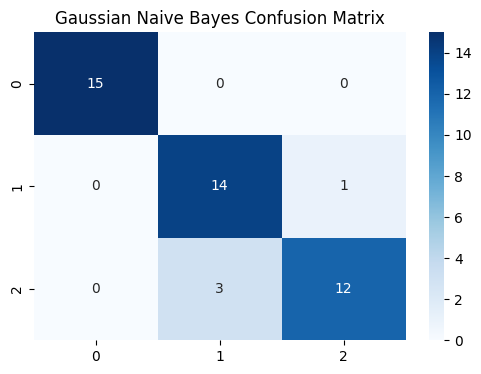

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()


## Example: Text Classification (MultinomialNB)


In [8]:
# Sample text dataset
data = pd.DataFrame({
    "Text": [
        "I love this product", 
        "This is a great movie", 
        "I hate this item", 
        "Terrible experience", 
        "Amazing and fantastic", 
        "Worst purchase ever"
    ],
    "Label": ["Positive", "Positive", "Negative", "Negative", "Positive", "Negative"]
})

# Encode labels
le = LabelEncoder()
data["Label_enc"] = le.fit_transform(data["Label"])

# Feature extraction (Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_text = cv.fit_transform(data["Text"])
y_text = data["Label_enc"]

# Train-test split
X_train_txt, X_test_txt, y_train_txt, y_test_txt = train_test_split(X_text, y_text, test_size=0.3, random_state=42)

# Train MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_txt, y_train_txt)
y_pred_txt = mnb.predict(X_test_txt)

print("Text Classification Accuracy:", accuracy_score(y_test_txt, y_pred_txt))


Text Classification Accuracy: 0.0


### 🔑 Key Takeaways
- Naive Bayes is **fast, simple, and effective**, especially for **high-dimensional data**.
- GaussianNB → Continuous features  
- MultinomialNB → Count features (text)  
- BernoulliNB → Binary features (yes/no)  
- Assumes feature independence → works surprisingly well even if assumption is not fully true.
